## <span style="color:blue">Code groups</span>


### <span style="color:#008891">Lists of items grouped by use and/or industry for analysis </span>

Identification codes are predominately from EU Marine Strategy Framework Directive (MSFD) Masterlist. Codes were added for this project to increase the identification of items commonly found in Swiss freshwater systems. For the complete list visit:
[mcc.jrc.ec.europa.eu › documents](https://mcc.jrc.ec.europa.eu/documents/201702074014.pdf) 
Annex 8.1 - Master List of Categories of Litter Items. 
[https://www.hammerdirt.ch/ ](https://www.hammerdirt.ch/) 
Documents: Additional Codes for Swiss Waterways

Individual codes have been grouped to best describe item usage and possible sources. 

Group 2 contains the following use catagories:
1. wastewater: items released from water treatment plants includes items likely toilet flushed   
2. micro plastics (< 5mm): fragmented plastic items and pre-production plastic resins
3. infrastructure: items related to construction and maintenance of all buildings, roads and water/power supplies 
4. food/drink: primarily single use plastic items related to consuming food and drinks outdoors  
5. agriculture: primarily industrial sheeting includes: mulch films, row coverings, polytunnels, greenhouse sheeting, soil fumigation films, bale wraps
6. tobacco: primarily cigarette filters includes all smoking related material 
7. recreation: includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco   
8. packaging non food/drink: packaging or wrapping material not identified as food, drink nor tobacco related  
9. plastic pieces: foam and plastic fragments of indeterminate origin and use 
10. personal items: accessories, hygiene and clothing related
11. Unclassified: ungrouped item codes


__What this does:__ This note book has codes gouped by industry or use. The grouping is not finite and individual codes maybe added or removed. The grouping is derived from field observations and research to answer fundemental questions:

1. what is the item

2. how is the item used

3. where did the item come from

__When to use it:__ May be used to analyze a series of coded items related by use or source and can be used with additional variables:

1. population densities

2. infrastructure densities

3. waterway concentrations

4. seasonality

5. regional differences

6. previous and/or other current data



#### Tasks:add photos, sources

In [1]:
# sys, file and nav packages:
import os
import datetime as dt
import csv

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt 


# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import seaborn as sns
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


# home brew utitilties
import utilities.utility_functions as ut

# documenting
from IPython.display import Markdown as md

def make_table_grids(anax):
    anax.grid(False)
    anax.spines["top"].set_visible(False)
    anax.spines["right"].set_visible(False)
    anax.spines["bottom"].set_visible(False)
    anax.spines["left"].set_visible(False)
    return(anax)
def table_fonts(a_table, size=12):
    a_table.auto_set_font_size(False)
    a_table.set_fontsize(size)
    
# method to save
files_generated=[]
def add_output(a_name, a_tag, atype="table", fignum=0, a_list=files_generated):
    tableonefile = F"{project_directory}/{a_name}"
    files_generated.append({'tag':a_tag, 'number':fignum, 'file':tableonefile,'type':atype})
    plt.savefig(tableonefile, dpi=300)


    
# table kwargs
table_k = dict(loc="top left", bbox=(0,0,1,1), colWidths=[.5, .5], cellLoc='center')
tablecenter_k = dict(loc="top left", bbox=(0,0,1,1), cellLoc='center')
tabtickp_k = dict(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
title_k = {'loc':'left', 'pad':12, 'linespacing':1.5, 'fontsize':12}
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

table_num = 1

In [2]:
# the local file structure. The resources are located in the corresponding directory.
# the purpose and date should be included in the filename when saving results to output
most_recent, survey_data, location_data, code_defs, stat_ent, geo_data, output = ut.make_local_paths()

In [3]:
# probably want to keep these... the works already done
# aggregated survey data
dfAgg = pd.read_csv(F"{survey_data}/results_with_zeroes_aggregated_parent.csv")
dfAgg['date'] = pd.to_datetime(dfAgg['date'])

# non aggregated survey data
dfSurveys = pd.read_csv(F"{survey_data}/results_with_zeroes.csv")
dfSurveys['date'] = pd.to_datetime(dfSurveys['date'])

# beach data
dfBeaches = pd.read_csv(F"{location_data}/beaches_pop_bfs.csv")

# code definitions
dfCodes = pd.read_csv(F"{code_defs}/mlw_codes.csv")

today = dt.datetime.now().date().strftime("%Y-%m-%d")

In [4]:
project_directory = ut.make_project_folder(output, 'code_groups')

### <span style="color:#008891">Group 2 codes</span>
Group 2 accounts for the ever increasing reliance on plasticulture (agricultural plastics) and attributes the idustrial sheeting to agriculture use. 
Group 2 also includes unidentified plastic and foam pieces 0.5-50 cm as a group.

In [5]:
# kwargs for the abundance class
code_group2 = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "food and drink":"foodstuff.json",
    "agriculture":"ag2.json",
    "tobacco":"tobac.json",
    "plastic pieces":"plasticpcs.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json",    
}
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/code_group2.json", data=code_group2)
# groups.append({"code_group2":code_group2})

putting: output/code_groups/code_group2.json


### <span style="color:#008891">Micro codes</span>

Micro codes are all micro plastics and foams from Annex 8.1 - Master List of Categories of Litter Items G103-G123. Not all codes have been identified in our data. 

In [6]:
grouped = []
groups = {}

In [7]:
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]
ut.push_this_to_json(filename=F"{project_directory}/codeListMicros.json", data=codesmicro)
grouped = grouped + codesmicro
groups.update({x:'micro' for x in codesmicro})

putting: output/code_groups/codeListMicros.json


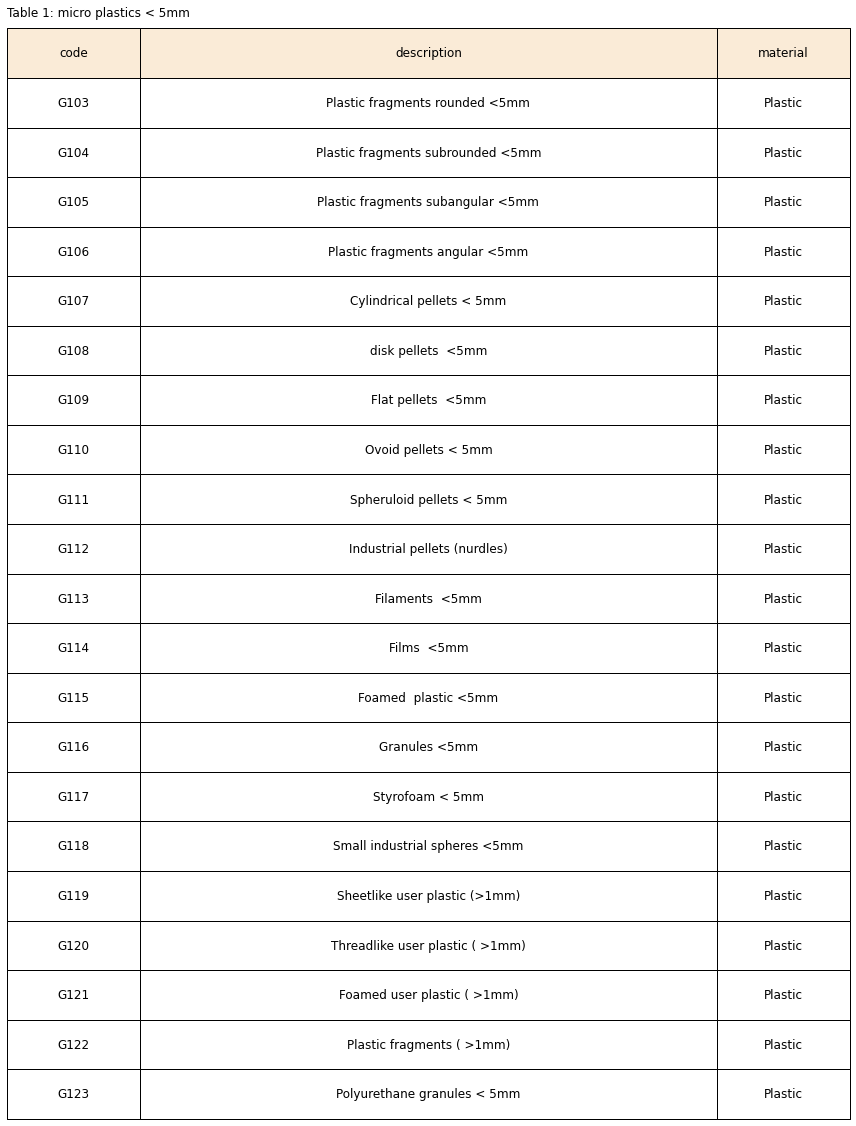

In [8]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(codesmicro)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: micro plastics < 5mm", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Micro codes are all micro plastics and foams"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Wastewater treatment codes</span>
Wastewater treatment codes includes items that may have been toilet flushed and released from a water treatment bypass or inadequate filtering for items such as cotton swabs. Note code G98 includes diapers and wipes. Diapers are an exception in Swiss water systems the quantities should be attributed to personal hygiene wipes. 

In [9]:

wastewater = [
    'G91',
    'G95',
    'G96',
    'G98',
    'G97',
    'G100',
    'G133',
    'G932',
    'G144'
]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/wastewater.json", data=wastewater)
grouped = grouped + wastewater

groups.update({x:'waste_water' for x in wastewater})

putting: output/code_groups/wastewater.json


In [10]:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

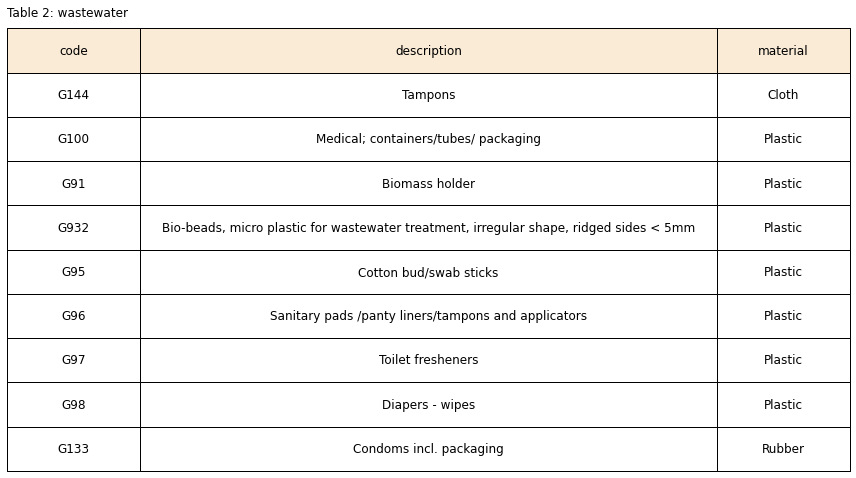

In [11]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(wastewater)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: wastewater", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items specific to wastewater treatment"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Recreation codes</span>

Recreation codes includes fishing, hunting, boating and beach related items and excludes food, drink and tobacco items.  

In [12]:
recreation = [
    'G32',
    'G43',
    'G48',
    'G49',
    'G50',
    'G49',
    'G51',
    'G52',
    'G53',
    'G54',
    'G53',
    'G55',
    'G56',
    'G57',
    'G58',
    'G59',
    'G60',
    'G61',
    'G62',
    'G63',
    'G70',
    'G73',
    'G86',
    'G92',
    'G94',
    'G206',
    'G132',
    'G142',
    'G143',
    'G155',
    'G163',
    'G164',
    'G167',
    'G182',
    'G183',
    'G125',
    'G126',
    'G11',
    'G213',
    'G904',
    'G940'
  ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/recreation.json", data=recreation)
grouped = grouped + recreation
# groups.append({"recre":recreation})
groups.update({x:'recre' for x in recreation})


putting: output/code_groups/recreation.json


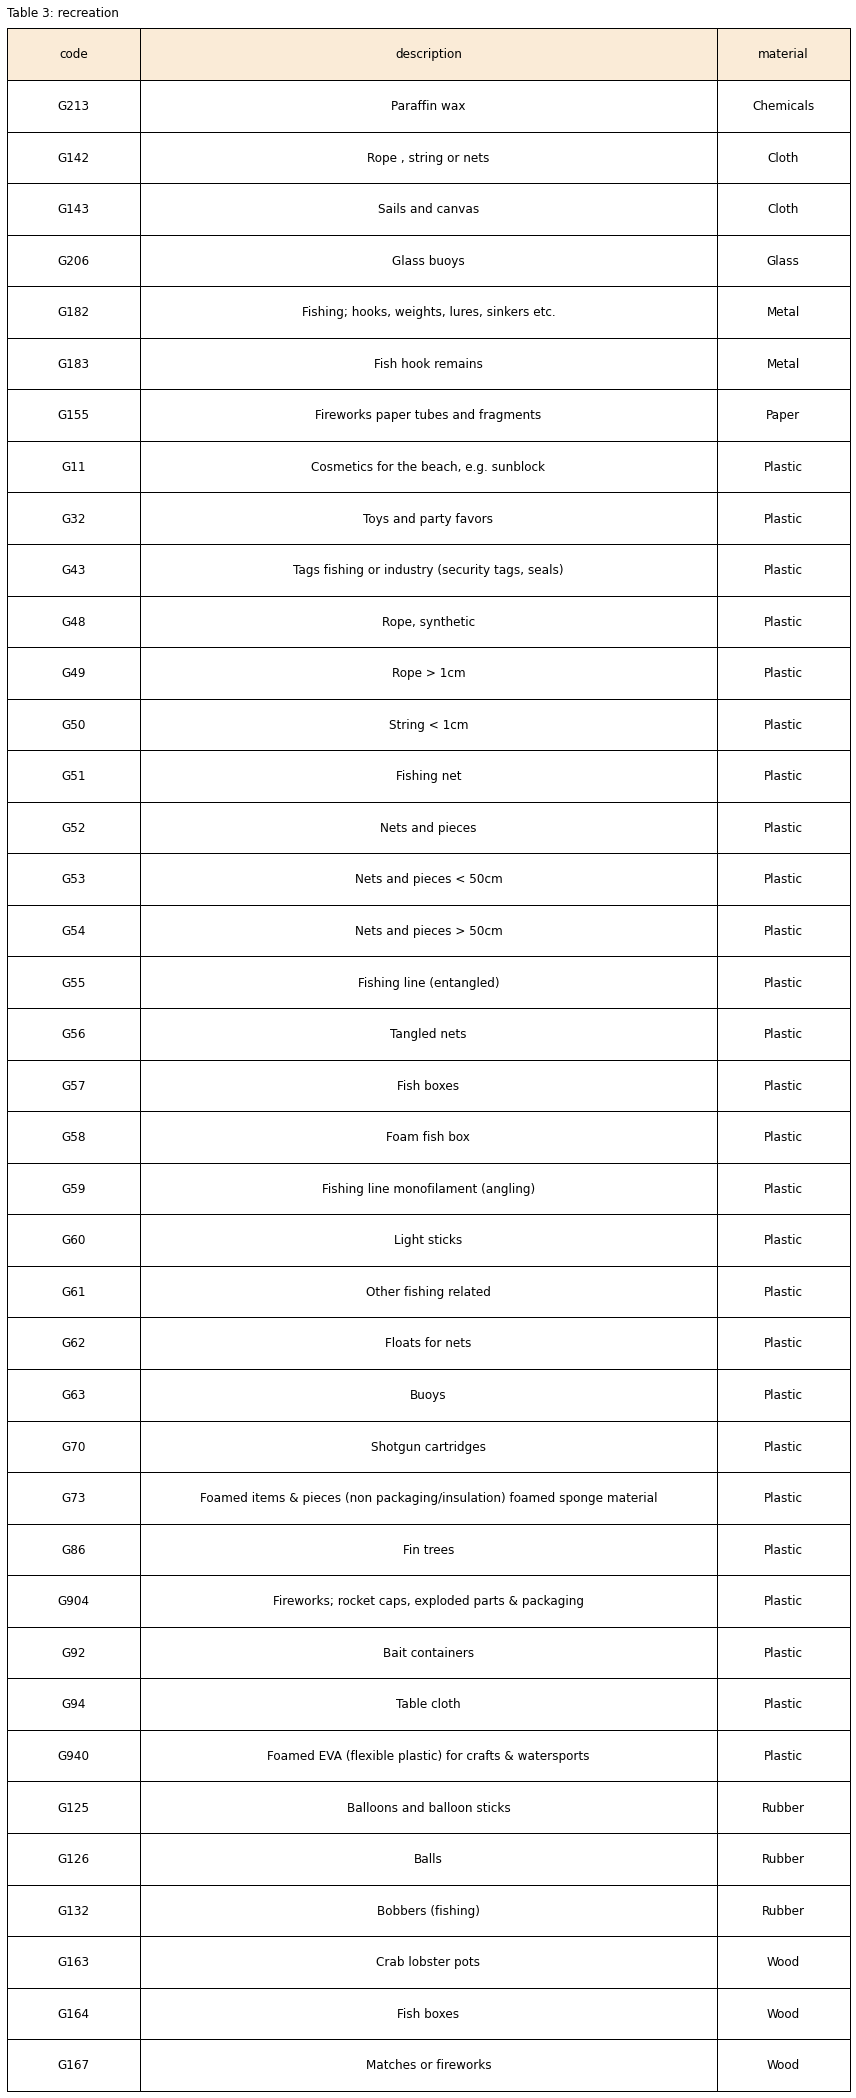

In [13]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(recreation)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: recreation", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Fishing, hunting, boating and beach related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Food and drink codes</span>

Food and drink codes includes consumable items related to picknicking from Annex 8.1 - Master List of Categories of Litter Items. 

In [14]:
foodstuff = [
    'G1',
    'G8',
    'G7',
    'G10',
    'G21',
    'G24',
    'G30',
    'G151',
    'G175',
    'G176',
    'G177',
    'G178',
    'G179',
    'G181',
    'G200',
    'G150',
    'G153',
    'G159',
    'G165',
    'G31',
    'G33',
    'G34',
    'G35',
    'G926',
    'G938'
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/foodstuff.json", data=foodstuff)
grouped = grouped + foodstuff
# groups.append({"food":foodstuff})
groups.update({x:"food" for x in foodstuff})

putting: output/code_groups/foodstuff.json


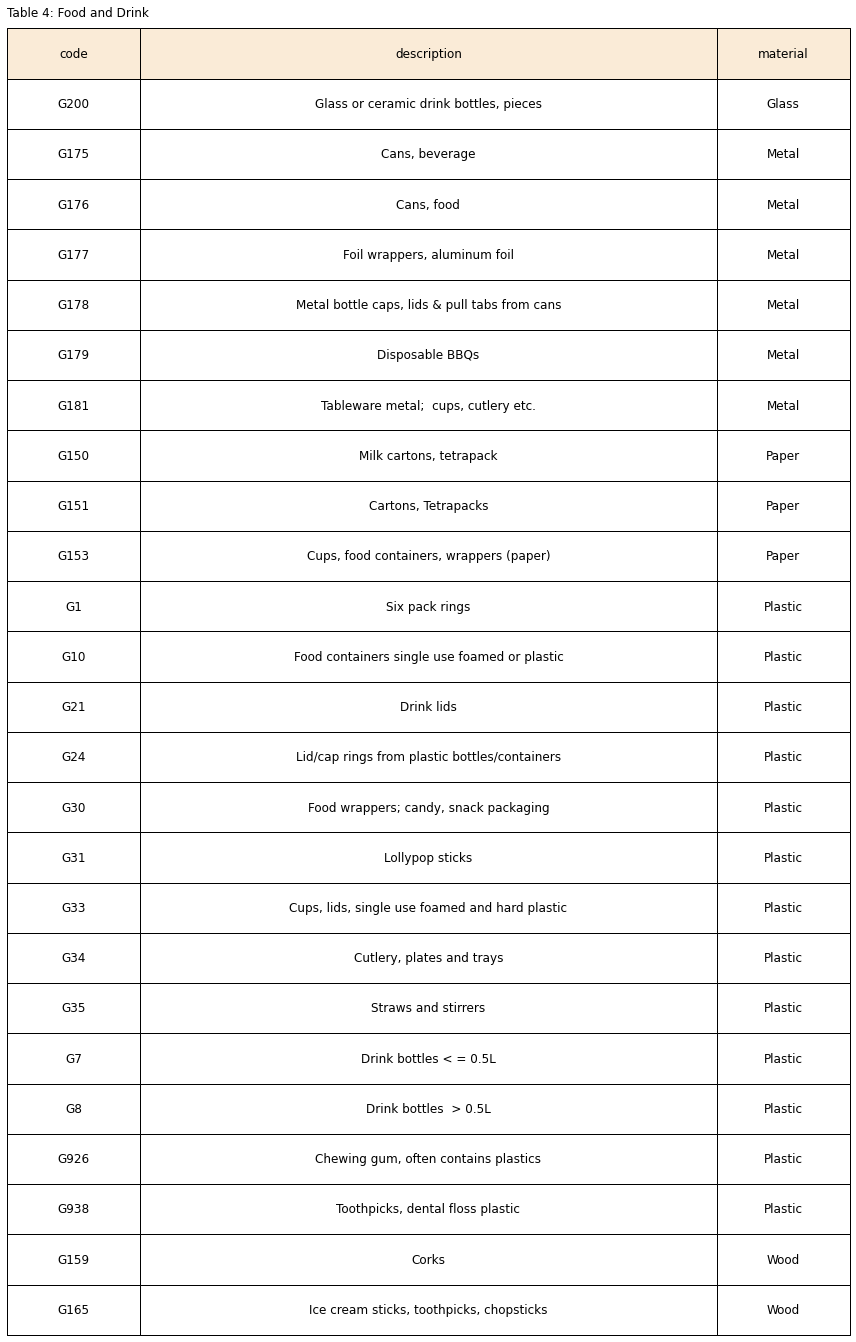

In [15]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(foodstuff)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Food and Drink", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Food and drink related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Agriculture2 Complete list codes</span>
Agriculture includes common items from what is known as plasticulture or "ag plastics".

In [16]:
ag2 = ["G36",
    "G936",
    "G937",
    "G943"
    "G13",
    "G14",
    "G15",
    "G16", 
    "G18", 
    "G38", 
    "G41",
    "G65",
    "G67",
    "G90",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G191",
    "G192",
    "G934",
      "G943"]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/ag2.json", data=ag2)
grouped = grouped + ag2
# groups.append({"ag2":ag2})
groups.update({x:"ag2" for x in ag2})

putting: output/code_groups/ag2.json


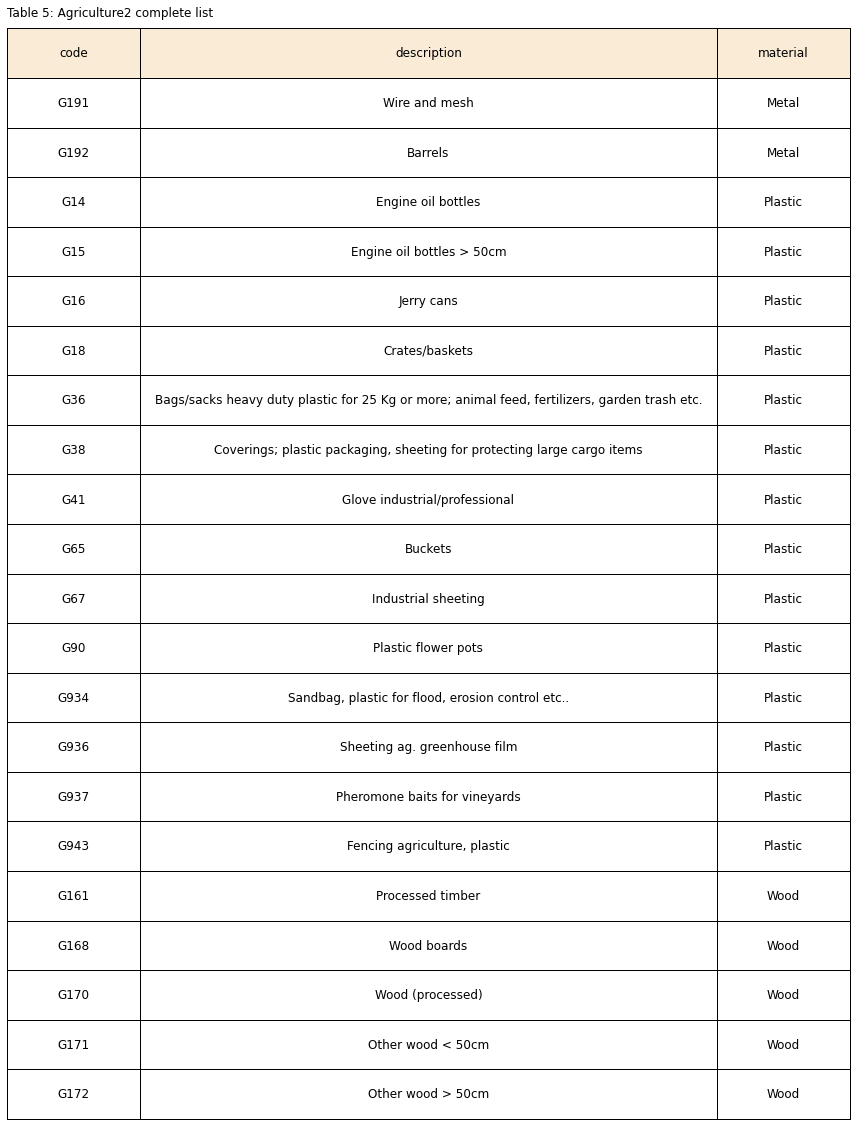

In [17]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(ag2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Agriculture2 complete list", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Agriculture2 complete list"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Construction2 codes</span>
Codes G909-G912 were created to differentiate foams used for insulation from packaging foams. The data is aggregated to parent codes G74, G81 and G82.

In [18]:

construction2= ['G9',
                'G13',
                'G204',
                'G187',
                'G919',
                'G65',
                'G17',
                'G22',
                'G66',
                'G68',
                'G69',
              'G72',
              'G74',
              'G81',
              'G82',
              'G83',
              'G87',
              'G89',
              'G93',
              'G160',
              'G162',
              'G166',
              'G169',
              'G174',
              'G186',
              'G188',
              'G189',
              'G190',
              'G194',
              'G214',
              'G908',
              'G909',
              'G910',
              'G911',
              'G912',
              'G921'
              'G927',
              'G931']
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/construction2.json", data=construction2)
grouped = grouped + construction2
groups.update({x:"construction2" for x in construction2})

putting: output/code_groups/construction2.json


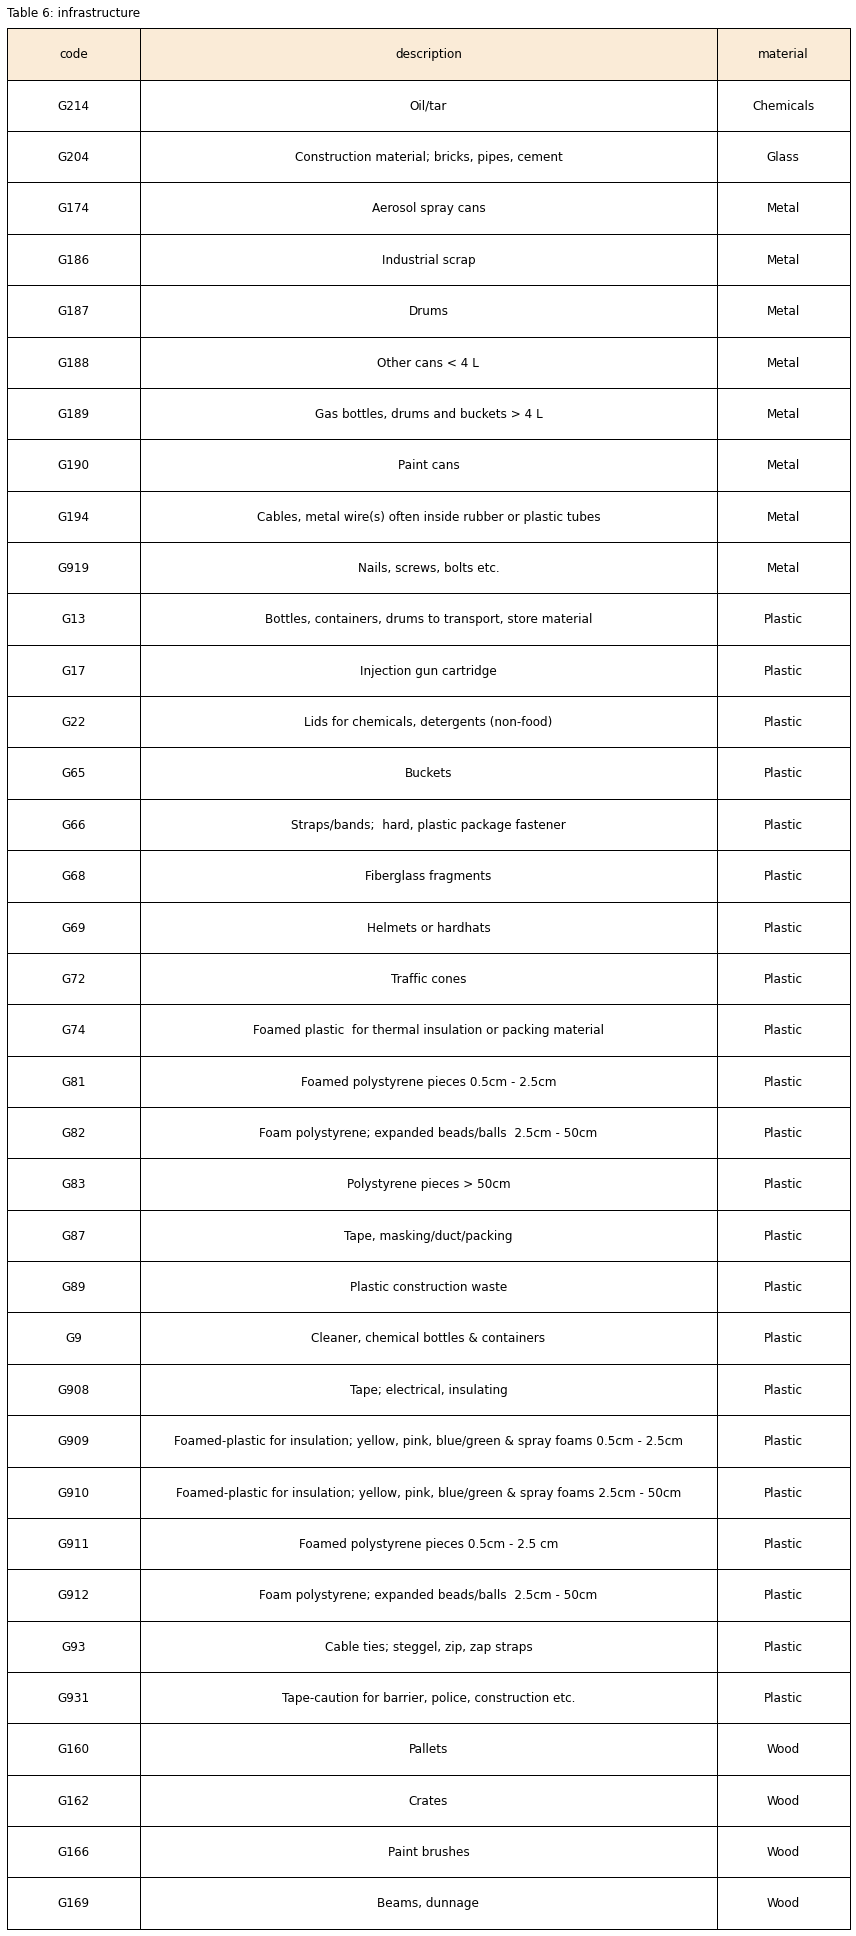

In [19]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(construction2)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: infrastructure", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Items related to construction industry"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Tobacco codes</span>
All tobacco related items.

In [20]:
tobac = [
    'G25',
    'G26',
    'G27',
    'G152'
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/tobac.json", data=tobac)
grouped = grouped + tobac

groups.update({x:"tobaco" for x in tobac})

putting: output/code_groups/tobac.json


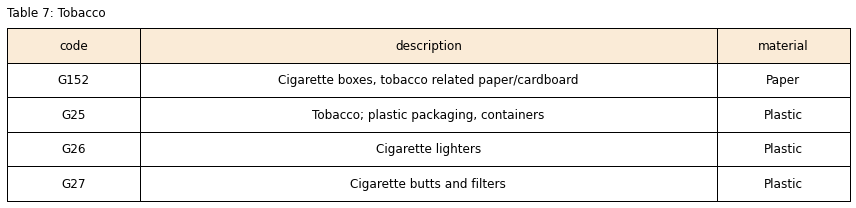

In [21]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(tobac)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Tobacco", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Tobacco related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Personal Items</span>

Personal effects likely left on site or close proximity.

In [22]:
pi = [
    'G211',
    'G84',
    'G99',
    'G101',
    'G102',
    'G131',
    'G135',
    'G136',
    'G138',
    'G139',
    'G28',
    'G29',
    'G154',
    'G195',
    'G900',
    'G901',
    'G902',
    'G903',
    'G905',
    'G906',
    'G907',
    'G913',
    'G914',
    'G915',
    'G918',
    'G916',
    'G933',
    'G929',
    'G945',
    'G923',
    'G12',
    'G71',
    'G88',
    'G935',
    'G930'
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/pi.json", data=pi)
grouped = grouped + pi
# groups.append({"pi":pi})
groups.update({x:"pi" for x in pi})


putting: output/code_groups/pi.json


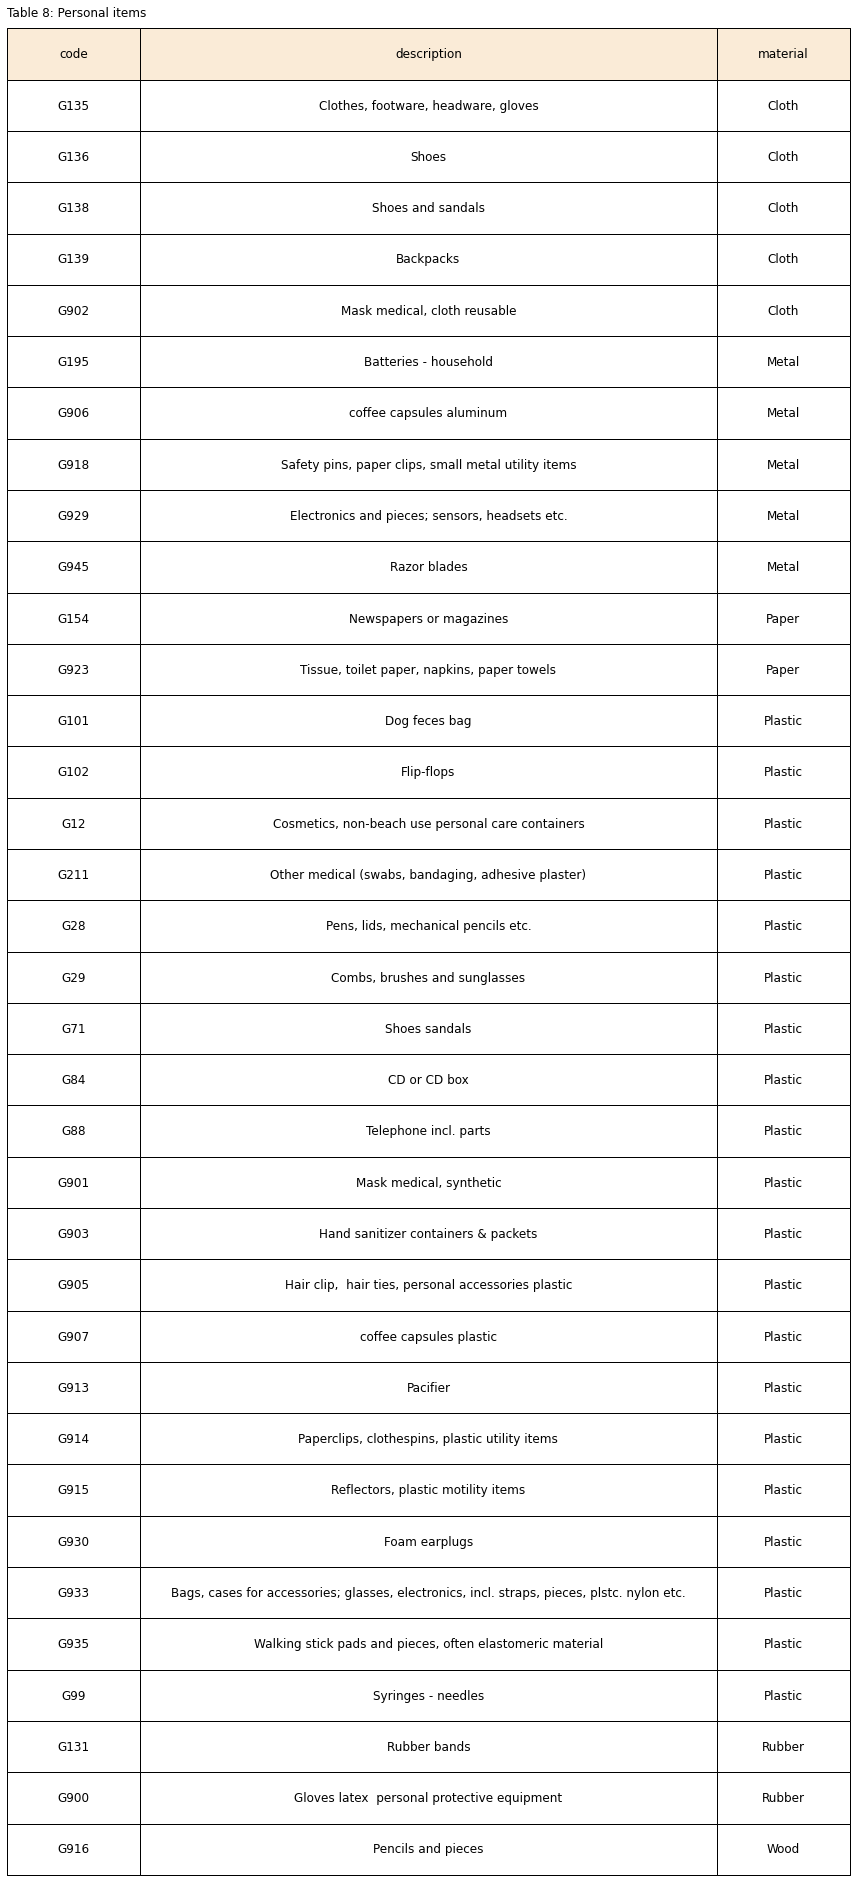

In [23]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(pi)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Personal items", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Personal use related items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Packaging not related to food, drink, tobacco or unknown origin.</span>


In [24]:
packaging = [
    "G23",
    "G2",
    "G146",
    "G148",
    "G149", 
    "G3", 
    "G20",
    "G4",
    "G6",
    "G147",
    "G922",
    "G941",
    "G156",
    "G157",
    "G158",
    "G925",
    "G5"
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/packaging.json", data=packaging)
grouped = grouped + packaging
# groups.append({"packaging":packaging})
groups.update({x:"packaging" for x in packaging})

putting: output/code_groups/packaging.json


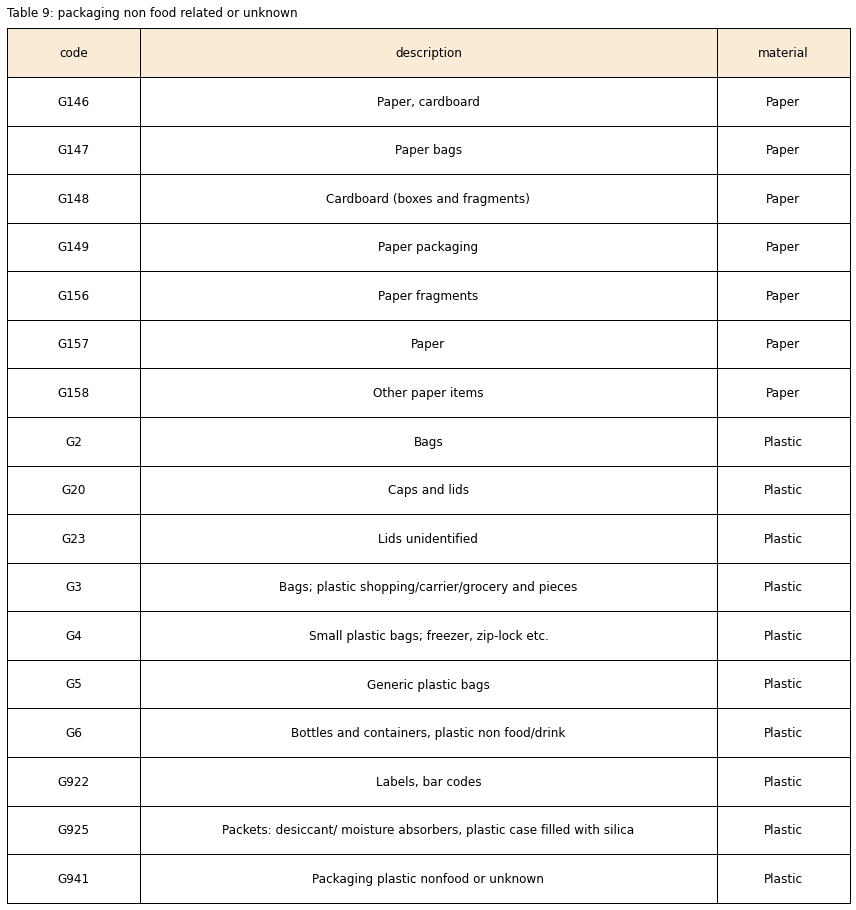

In [25]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(packaging)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: packaging non food related or unknown", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Packaging related items not identified as food, drink or tobacco"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:#008891">Plastic and foam pieces of unknown origin</span>


In [26]:
plasticpcs = [
    "G78",
    "G79",
    "G80",
    "G75", 
    "G76", 
    "77" 
    ]
# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/plasticpcs.json", data=plasticpcs)
grouped = grouped + plasticpcs
# groups.append({"plasticpcs":plasticpcs})
groups.update({x:"plasticpcs" for x in plasticpcs})

putting: output/code_groups/plasticpcs.json


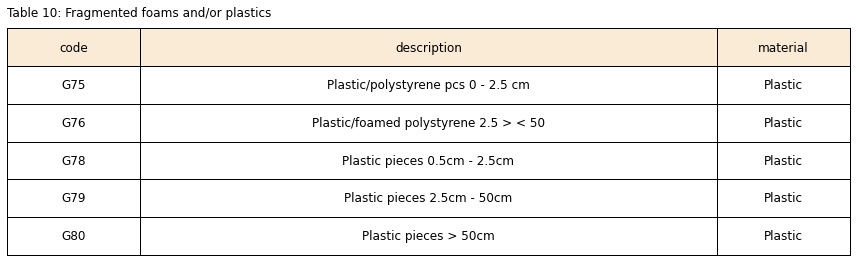

In [27]:
# make adjustments to table kwargs:
wwcodes = dfCodes[dfCodes.code.isin(plasticpcs)][['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: Fragmented foams and/or plastics", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Plastic fragments of unknown use of origin"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

In [28]:
### <span style="color:#008891">Recreation codes</span>
print("\ncodes grouped:\n")
print(grouped)
print("\ncodes not grouped:\n")
print(dfCodes[~dfCodes.code.isin(grouped)].code.values)
print("\ncodes not grouped abrev list:\n")


codes grouped:

['G112', 'G106', 'G117', 'G103', 'G104', 'G105', 'G107', 'G108', 'G109', 'G110', 'G111', 'G113', 'G114', 'G115', 'G116', 'G118', 'G119', 'G120', 'G121', 'G122', 'G123', 'G91', 'G95', 'G96', 'G98', 'G97', 'G100', 'G133', 'G932', 'G144', 'G32', 'G43', 'G48', 'G49', 'G50', 'G49', 'G51', 'G52', 'G53', 'G54', 'G53', 'G55', 'G56', 'G57', 'G58', 'G59', 'G60', 'G61', 'G62', 'G63', 'G70', 'G73', 'G86', 'G92', 'G94', 'G206', 'G132', 'G142', 'G143', 'G155', 'G163', 'G164', 'G167', 'G182', 'G183', 'G125', 'G126', 'G11', 'G213', 'G904', 'G940', 'G1', 'G8', 'G7', 'G10', 'G21', 'G24', 'G30', 'G151', 'G175', 'G176', 'G177', 'G178', 'G179', 'G181', 'G200', 'G150', 'G153', 'G159', 'G165', 'G31', 'G33', 'G34', 'G35', 'G926', 'G938', 'G36', 'G936', 'G937', 'G943G13', 'G14', 'G15', 'G16', 'G18', 'G38', 'G41', 'G65', 'G67', 'G90', 'G161', 'G168', 'G170', 'G171', 'G172', 'G191', 'G192', 'G934', 'G943', 'G9', 'G13', 'G204', 'G187', 'G919', 'G65', 'G17', 'G22', 'G66', 'G68', 'G69', 'G72', 'G74

In [29]:
ng=dfCodes[~dfCodes.code.isin(grouped)]

figname = F"workinglist.csv"
filename=F"{output}/code_groups/{figname}"
ng.to_csv(filename, index=None) 

In [30]:
g124=ng[ng.code == "G124"]
g124

,code,material,description,source,source_two,source_three,parent_code,direct,single_use,micro,ospar_code
101,G124,Plastic,Other plastic or foam products,Undefined,Where does it come from,NaN,Parent code,True,False,False,NaN


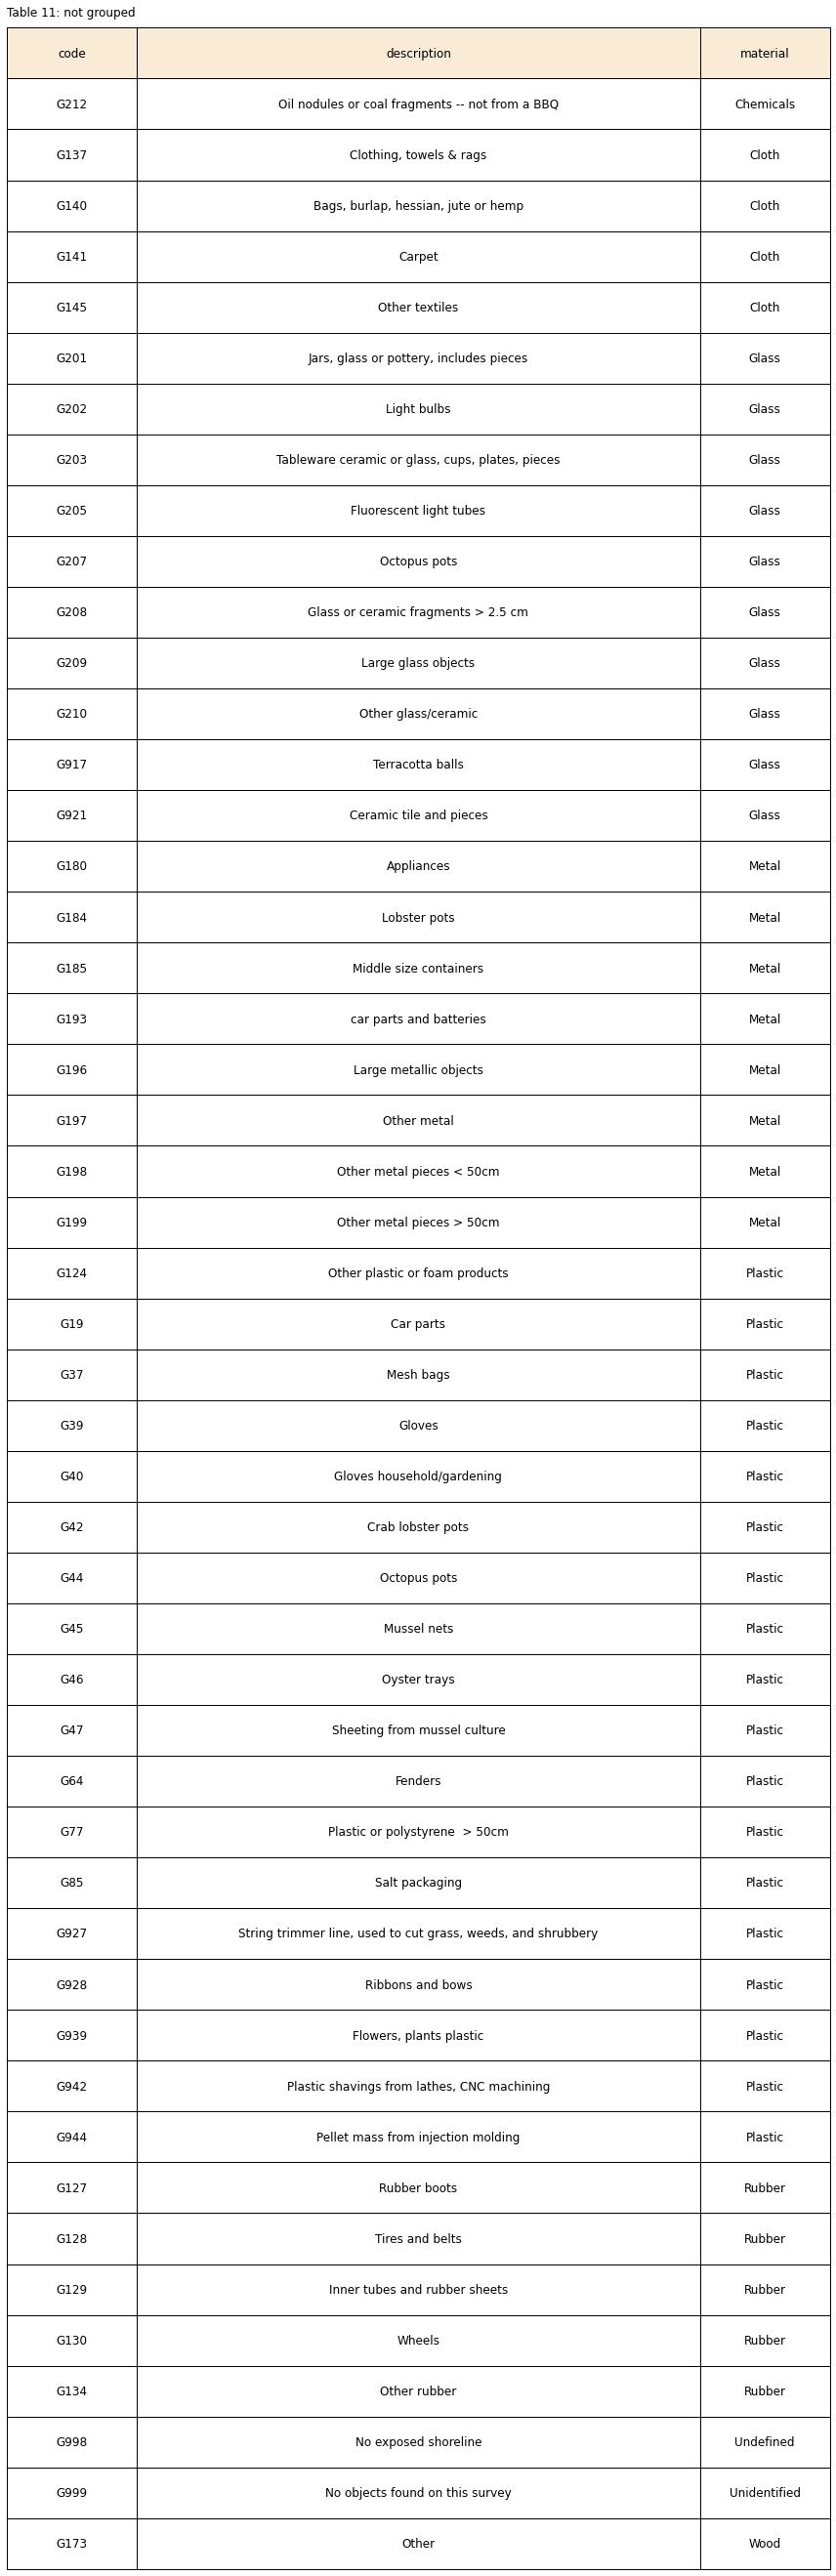

In [31]:
# make adjustments to table kwargs:
wwcodes = ng[['code', 'material', 'description']]
wwcodes = wwcodes[['code', 'description', 'material']]

tablecenter_k = dict(loc="center", bbox=(0,0,1,1), colWidths=[12,52, 12], cellLoc='center')
tabledata=wwcodes
fig, ax = plt.subplots(figsize=(12, len(tabledata)*.75))
ax = make_table_grids(ax)
a_table = mpl.table.table(
    cellText=tabledata.values,
    colLabels=tabledata.columns,
    colColours=['antiquewhite' for col in list(tabledata.columns)],    
    ax=ax,
    **tablecenter_k)

table_fonts(a_table, size=12)

ax.add_table(a_table)
ax.tick_params(**tabtickp_k)
ax.set_title(F"Table {table_num}: not grouped", **title_k)


plt.tight_layout()

figname = F"table{table_num}.jpg"
a_tag="Ungrouped items"
add_output(figname, a_tag, atype="table", fignum=table_num)

plt.show()
plt.close()

table_num += 1

### <span style="color:blue">Codes no id</span>

In [32]:

hmm = dfSurveys.copy()
hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

found = hmm.code.unique()

ahh=[code for code in dfCodes.code if code not in found]


# saving to .json
ut.push_this_to_json(filename=F"{project_directory}/codeNotfound.json", data=ahh)

# construction codes that have not been identified
[code for code in construction2 if code in ahh]

putting: output/code_groups/codeNotfound.json


['G187', 'G69', 'G72', 'G169', 'G189']

In [33]:
dfCodes['source_two'] = 'unk'

def assgin_a_group(x,groups):
    try:
        send = groups[x]
    except:
        send = 'unk'
    return send
    
    
for group in groups:
    dfCodes['source_two'] = dfCodes.code.map(lambda x: assgin_a_group(x,groups))
dfCodes.groupby('source_two').code.count()

source_two
ag2              20
construction2    36
food             25
micro            21
packaging        17
pi               35
plasticpcs        5
recre            39
tobaco            4
unk              49
waste_water       9
Name: code, dtype: int64

#### Thanks for visiting

if not contact shannon@hammerdirt.ch

In [34]:
dfCodes[dfCodes.source_two == 'cons']
figname = F"codes_with_groups.csv"
filename=F"{output}/code_groups/{figname}"
dfCodes.to_csv(filename, index=None) 

In [35]:
author = "shannon@hammerdirt.ch"
my_message = "fun is outside"
print(F"\nProduced by: {author}\nDate: {today}\n\n{my_message}")


Produced by: shannon@hammerdirt.ch
Date: 2021-05-18

fun is outside
